# <font color='blue'>Data Science Academy - Deep Learning Frameworks</font>

## Theano - Introdução

In [1]:
# Instalação e configuração
!conda install theano

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/dmpm/anaconda3:
#
theano                    0.9.0                    py36_0  


Theano pode compilar de forma transparente em hardware diferente. O dispositivo que ele usa por padrão depende de seu arquivo .theanorc e quaisquer variáveis de ambiente definidas, como descrito em detalhes aqui: http://deeplearning.net/software/theano/library/config.html Atualmente, você deve usar float32 quando usar mais GPUs, mas a maioria das pessoas prefere usar float64 em uma CPU. Por conveniência, Theano fornece a variável de configuração floatX que designa a precisão de flutuação a ser usada. Por exemplo, você pode executar um script Python com determinadas variáveis de ambiente definidas para usar a CPU:

THEANO_FLAGS = dispositivo = cpu, floatX = float64 python seu_script.py

Ou GPU:

THEANO_FLAGS = dispositivo = gpu, floatX = float32 python seu_script.py

In [2]:
# Executando um modelo com o Theano
import theano
import numpy
 
# Cria a variável x que será um vetor de floats    
x = theano.tensor.fvector('x')

# Cria a variável W que será um vetor com valores [0.3, 0.7] e atribui o nome W
W = theano.shared(numpy.asarray([0.3, 0.7]), 'W')

# Define a multiplicação element-wise de x por W, realiza a soma e grava em y
y = (x * W).sum()
 
# Define uma função theano com input x e output y
f = theano.function([x], y)
 
# Chama a função e passa os valores de x    
output = f([1.0, 1.0])

# Imprime o resultado (y)
print (output)

1.0


In [3]:
# Carregando Pacotes
import numpy as np
import matplotlib.pyplot as plt
import theano
from theano import tensor as T
from theano import function

## Variáveis

Podemos definir variáveis que ainda não possuem valores. Normalmente, as variáveis são utilizadas para entradas na nossa rede. Theano não terá acesso aos seus nomes de variáveis Python, então você tem que atribuir nomes Theano explícitos para cada variável se você quer que eles sejam referidos como algo mais útil do que apenas "um tensor". Em Theano, todos os símbolos devem ser digitados. Em particular, T.dscalar é o tipo que atribuímos a "matrizes 0-dimensionais (escalares) de duplas (d)". É um tipo de dado no Theano.

Chamando T.dscalar() com um argumento de sequência de caracteres, você cria uma variável que representa uma quantidade escalar de ponto flutuante com o nome fornecido. Se você fornecer nenhum argumento, o símbolo será anônimo. Os nomes não são necessários, mas podem ajudar com a depuração do código.

In [4]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
f = theano.function([x,y],z)

In [5]:
f(2,3)

array(5.0)

In [6]:
f(16.3, 12.1)

array(28.4)

In [7]:
type(x)

theano.tensor.var.TensorVariable

In [8]:
x.type

TensorType(float64, scalar)

In [9]:
T.dscalar

TensorType(float64, scalar)

In [10]:
x.type is T.dscalar

True

In [11]:
z = x + y

In [12]:
from theano import pp
print (pp(z))

(x + y)


In [13]:
f = theano.function([x,y],z)

In [14]:
import theano.tensor as T
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
z.eval({x:16.3,y:12.1})

array(28.4)

In [15]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y
f = theano.function([x,y],z)

In [16]:
f([[1,2],[3,4]], [[10,20],[30,40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

In [17]:
import numpy
f(numpy.array([[1,2],[3,4]]), numpy.array([[10,20], [30,40]]))

array([[ 11.,  22.],
       [ 33.,  44.]])

In [18]:
a = T.scalar()
b = T.scalar()

y = a * b

multiply = theano.function(inputs=[a, b], outputs=y)

print (multiply(1, 2))
print (multiply(3, 3))

2.0
9.0


Esses tipos estão disponíveis:

#### Byte: bscalar, bvector, bmatrix, testa, bcol, btensor3, btensor4
#### Inteiros de 16 bits: wscalar, wvector, wmatrix, wrow, wcol, wtensor3, wtensor4
#### Inteiros de 32 bits: iscalar, ivector, imatrix, irow, icol, itensor3, itensor4
#### Inteiros de 64 bits: lscalar, lvector, lmatrix, lrow, lcol, ltensor3, ltensor4
#### Float: fscalar, fvector, fmatrix, frow, fcol, ftensor3, ftensor4
#### Double: dscalar, dvector, dmatrix, drow, dcol, dtensor3, dtensor4
#### Complex: cscalar, cvector, cmatrix, corvo, ccol, ctensor3, ctensor4

## Grafos Simbólicos

Em Theano, todos os algoritmos são definidos simbolicamente. É mais como escrever matemática do que escrever código. As variáveis simbólicas no Theano não têm um valor explícito.O submódulo theano.tensor tem vários tipos de variáveis simbólicas primitivas. Também chamados de variáveis simbólicas.

In [19]:
# Aqui, estamos definindo uma variável escalar (0-d). O argumento dá à variável seu nome.
foo = T.scalar('foo')

# Agora, podemos definir outra variável que é apenas foo squared.
bar = foo**2

# Isso também será uma variável theano.
print(type(bar))
print(bar.type)

# Usando a função theano pp (pretty print), vemos que
# bar é definida simbolicamente como o quadrado de foo
print(theano.pp(bar))

<class 'theano.tensor.var.TensorVariable'>
TensorType(float64, scalar)
(foo ** TensorConstant{2})


In [20]:
# Variáveis simbólicas não tem valor explícito
a = T.vector()      # declara a variável
b = T.vector()      # declara a variável
out = a**2 + b**2 + 2*a*b       # expressão que representa a variável simbólica "out"
f = theano.function([a,b], out) # compila a função
print (f([2,3],[3,4]))

[ 25.  49.]


## Funções

As funções no Theano são basicamente meios para interagir com o grafo simbólico. Comumente, usamos as funções para passar a entrada em nossa rede e coletar a saída resultante.

Quando construímos uma função, o Theano assume e executa parte de sua própria magia. Ele constrói o grafo computacional e otimiza o máximo possível. Ele reestrutura as operações matemáticas para torná-las mais rápidas e estáveis, compila algumas partes em C, move alguns tensores para a GPU, etc.

A compilação Theano pode ser controlada definindo o valor do modo na variável de ambiente THEANO_FLAGS:

#### FAST_COMPILE - Rápido para compilar, lento para ser executado. Implementações Python somente, otimização mínima do grafo.
#### FAST_RUN - lento para compilar, rápido para executar. Implementações em C onde disponíveis, gama completa de otimizações.

In [21]:
f = theano.function([foo], bar)
print(f(3))

9.0


In [22]:
# Alternativamente, em alguns casos você pode usar o método eval da variável simbólica.
# Isso pode ser mais conveniente do que definir uma função.
# O método eval recebe um dicionário onde as "chaves" são variáveis theano e os "valores" são valores para essas variáveis.
print(bar.eval({foo: 3}))

9.0


In [23]:
# Também podemos usar funções Python para construir variáveis Theano.
# Isso pode tornar a sintaxe mais limpa para exemplos mais complicados.
def square(x):
    return x**2
bar = square(foo)
print(bar.eval({foo: 3}))

9.0


In [24]:
# Função Logística
import theano.tensor as T
from theano import function
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = function([x],s)
logistic([[0,1],[-1,-2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [25]:
# Função tangente
s2 = (1 + T.tanh(x/2)) / 2
logistic2 = function([x],s2)
logistic2([[0,1],[-1,-2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

## Shared Variables

Podemos também definir variáveis compartilhadas, que são compartilhadas entre diferentes funções e diferentes chamadas de função. Normalmente, as variáveis compartilhadas seriam usadas para pesos em nossa rede neural. O Theano tentará automaticamente mover as variáveis compartilhadas para a GPU, desde que esteja disponível, para acelerar a computação.

In [26]:
shared_var = theano.shared(np.array([[1, 2], [3, 4]], dtype=theano.config.floatX))
print(shared_var.type())

<TensorType(float64, matrix)>


In [27]:
# Podemos definir o valor de uma variável compartilhada usando set_value
shared_var.set_value(np.array([[3, 4], [2, 1]], dtype=theano.config.floatX))

# E obter o valor com get_value
print(shared_var.get_value())

[[ 3.  4.]
 [ 2.  1.]]


In [28]:
# O primeiro argumento de theano.function (inputs) diz ao Theano quais devem ser os argumentos para a função compilada.
# Note que, como shared_var é compartilhado, ele já tem um valor, portanto, não precisa ser uma entrada para a função.
# Portanto, Theano implicitamente considera shared_var uma entrada para uma função usando shared_squared e portanto 
# não precisamos incluí-lo no argumento inputs da função theano.function().
shared_squared = shared_var**2
function_1 = theano.function([], shared_squared)
print(function_1())

[[  9.  16.]
 [  4.   1.]]


## Updates

Também podemos atualizar o estado de uma variável compartilhada em uma função com Updates

In [29]:
# Variável
subtract = T.matrix('subtract')

# Updates recebe um dict onde as chaves são variáveis compartilhadas e os valores são o novo valor 
# que a variável compartilhada deve assumir
# Aqui, as atualizações serão definidas como shared_var = shared_var - subtract
function_2 = theano.function([subtract], shared_var, updates={shared_var: shared_var - subtract})
print("shared_var before subtracting [[1, 1], [1, 1]] using function_2:")
print(shared_var.get_value())

# Subtract [[1, 1], [1, 1]] de shared_var
function_2(np.array([[1, 1], [1, 1]], dtype=theano.config.floatX))
print("shared_var after calling function_2:")
print(shared_var.get_value())

# Observe que isso também altera a saída de function_1, porque shared_var é compartilhado!
print("New output of function_1() (shared_var**2):")
print(function_1())

shared_var before subtracting [[1, 1], [1, 1]] using function_2:
[[ 3.  4.]
 [ 2.  1.]]
shared_var after calling function_2:
[[ 2.  3.]
 [ 1.  0.]]
New output of function_1() (shared_var**2):
[[ 4.  9.]
 [ 1.  0.]]


## Gradientes

No cálculo vetorial o gradiente (ou vetor gradiente) é um vetor que indica o sentido e a direção na qual, por deslocamento a partir do ponto especificado, obtém-se o maior incremento possível no valor de uma grandeza a partir da qual se define um campo escalar para o espaço em consideração. Constrói-se assim, a partir do campo escalar e de um operador denominado operador gradiente, um campo vetorial, que atrela a cada ponto do espaço o correspondente vetor gradiente para a grandeza em consideração.

O módulo do vetor gradiente indica a taxa de variação da grandeza escalar com relação à distância movida quando desloca-se na direção e sentido do vetor gradiente (deslocamentos infinitesimais).

Um gradiente é a razão segundo a qual uma quantidade variável aumenta ou diminui. 

Por exemplo, o gradiente de diferença de potencial é a diferença de potencial por unidade de comprimento ao longo do condutor ou através do dielétrico em função do tempo. 

O gradiente de tensão , é a tensão por unidade de comprimento, ao longo de um circuito, ou outro percurso condutor por unidade de tempo, podendo ser positivo, ou negativo. 

O gradiente de uma função escalar é o co-vetor com a direção segundo qual ocorre a maior taxa de mudança da função. O seu módulo é igual à taxa da variação da função ao longo dessa direcção.

In [30]:
# Lembre-se que bar = foo ** 2
# Podemos calcular o gradiente de bar em relação a foo assim:
bar_grad = T.grad(bar, foo)

# Esperamos que bar_grad = 2 * foo
bar_grad.eval({foo: 10})

array(20.0)

## Regressão Linear

Quando estamos criando um modelo com Theano, primeiro definimos um grafo simbólico de todas as variáveis e operações que precisam ser executadas. E então podemos aplicar este grafo em entradas específicas para obter saídas.

Por exemplo, o que você acha que acontece quando esta linha de código Theano é executada em nosso script?

Y = (x * W).sum()

O sistema recebe x e W, multiplica-os e somar os valores. Certo? É um pouco mais complexo que isso!

Na verdade, criamos um objeto Theano y que sabe que seus valores podem ser calculados como o produto de x e W. Mas as operações matemáticas necessárias não são realizadas aqui. Na verdade, quando essa linha foi executada no nosso código de exemplo acima, x nem sequer tinha um valor ainda.

Ao encadear várias operações, estamos criando um grafo de todas as variáveis e funções que precisam ser usadas para alcançar os valores de saída. Esse grafo simbólico também é a razão pela qual só podemos usar operações específicas do Theano ao definir nossos modelos. Se tentássemos integrar funções de alguma biblioteca Python aleatória em nossa rede, eles tentariam executar os cálculos imediatamente, ao invés de retornar uma variável Theano conforme necessário. Exceções existem - Theano substitui alguns operadores Python básicos para agir como esperado, e NumPy bem integrado com Theano.

In [31]:
import theano
from theano import tensor as T
import numpy as np

# Define valores que serão usados como dados de entrada e saída para treinar o modelo
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

# Variáveis Theano
X = T.scalar()
Y = T.scalar()

# Definindo o modelo de regressão linear
def model(X, w):
    return X * w

# Variável compartilhada que servirá como um dos parâmetros do modelo
w = theano.shared(np.asarray(0., dtype=theano.config.floatX))

# Cria o modelo
y = model(X, w)

# Cost Function
cost = T.mean(T.sqr(y - Y))

# Gradiente
gradient = T.grad(cost=cost, wrt=w)

# Atualiza o valor do parâmetro
updates = [[w, w - gradient * 0.01]]

# Função para treinar o modelo
train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

# Treina o modelo
for i in range(100):
    for x, y in zip(trX, trY):
        train(x, y)

# Obtém o valor do parâmetro que foi aprendido pelo modelo
print (w.get_value())

2.040882466161671


## Visualizando Um Modelo de Regressão Linear

Iteração 1
w = 1.02880106

Iteração 2
w = 1.54428463

Iteração 3
w = 1.80256906

Iteração 4
w = 1.93198318

Iteração 5
w = 1.99682647

Iteração 6
w = 2.02931638

Iteração 7
w = 2.04559554

Iteração 8
w = 2.05375225

Iteração 9
w = 2.05783920

Iteração 10
w = 2.05988697

Iteração 11
w = 2.06091301

Iteração 12
w = 2.06142712

Iteração 13
w = 2.06168471

Iteração 14
w = 2.06181377

Iteração 15
w = 2.06187844

Iteração 16
w = 2.06191085

Iteração 17
w = 2.06192708

Iteração 18
w = 2.06193522

Iteração 19
w = 2.06193929

Iteração 20
w = 2.06194134



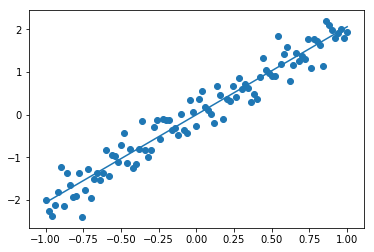

In [32]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

# Define valores que serão usados como dados de entrada e saída para treinar o modelo
x_train = np.linspace(-1, 1, 101)
t_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

# Plot dos dados
plt.scatter(x_train, t_train)

# Variáveis Theano
x = T.scalar()
t = T.scalar()

# Definindo o modelo de regressão linear
def model(x, w):
    return x * w

# Definindo o parâmetro como variável compartilhada
w = theano.shared(0.0)

# Criando o modelo
y = model(x, w)

# Cost Function
cost = T.mean((t - y) ** 2)

# Gradiente
g = T.grad(cost, w)

# Atualiza o parâmetro
updates = [(w, w - g * 0.01)]

# Compila a função para o treinamento
train = theano.function([x, t], cost, updates=updates)

# Treina o modelo
for i in range(20):
    print ("Iteração %d" % (i + 1))
    for x, t in zip(x_train, t_train):
        train(x, t)

    print ("w = %.8f" % w.get_value())
    print ()
    

# Plot da linha de regressão
plt.plot(x_train, w.get_value() * x_train)

## Fim